In [1]:
import pandas as pd
import numpy as np


In [3]:
file_path = "Future_Truck_Forecasting_Resume_Grade_Dataset_v2.xlsx"

df_hist = pd.read_excel(
    file_path,
    sheet_name="Historical_Data"
)

df_future = pd.read_excel(
    file_path,
    sheet_name="Future_Planning_Data"
)


In [4]:
df_hist.shape, df_future.shape


((19260, 15), (4000, 13))

In [5]:
df_hist.head()

,Date,Hour,Commodity,Dry_Cargo_Type,Operation,Customer,Storage_Type,Declared_Qty_Tons,Truck_Capacity_Tons,Actual_Truck_Count,Gate_No,Gate_Lanes,Gate_Capacity_Trucks_Per_Hour,Peak_Hour_Flag,Avg_Gate_Wait_Min
0,2025-05-06,9,Steel Coils,Break Bulk,Export,Tata Steel,Direct,118,13.0,4,Gate-D,2,30,1,13.0
1,2022-12-15,16,Project Cargo,Break Bulk,Import,Adani,Direct,265,10.0,3,Gate-A,4,70,1,18.0
2,2023-06-30,15,Cement,Dry Bulk,Import,NaN,Storage,950,19.0,54,Gate-C,2,35,0,51.0
3,2023-04-26,21,Grain,Dry Bulk,Export,Tata Steel,Direct,890,26.0,35,Gate-A,4,70,0,NaN
4,2024-12-20,12,Iron Ore,Dry Bulk,Import,Adani,Storage,1521,26.0,55,Gate-A,4,70,0,32.0


In [7]:
df_future.head()

,Date,Hour,Commodity,Dry_Cargo_Type,Operation,Customer,Storage_Type,Declared_Qty_Tons,Truck_Capacity_Tons,Gate_No,Gate_Lanes,Gate_Capacity_Trucks_Per_Hour,Peak_Hour_Flag
0,2025-11-27,6,Machinery,Break Bulk,Export,Tata Steel,Direct,148,14,Gate-C,2,35,0
1,2025-07-05,0,Iron Ore,Dry Bulk,Export,FCI,Direct,1968,24,Gate-B,3,50,0
2,2025-08-15,12,Fertilizer,Dry Bulk,Import,NTPC,Storage,402,22,Gate-A,4,70,0
3,2026-03-11,5,Steel Plates,Break Bulk,Import,Adani,Direct,149,12,Gate-C,2,35,0
4,2025-10-06,10,Coal,Dry Bulk,Import,JSW,Storage,506,23,Gate-C,2,35,1


In [11]:
df_hist.columns
df_future.columns


Index(['Date', 'Hour', 'Commodity', 'Dry_Cargo_Type', 'Operation', 'Customer',
       'Storage_Type', 'Declared_Qty_Tons', 'Truck_Capacity_Tons', 'Gate_No',
       'Gate_Lanes', 'Gate_Capacity_Trucks_Per_Hour', 'Peak_Hour_Flag'],
      dtype='object')

In [12]:
df_hist.dtypes


Date                             datetime64[ns]
Hour                                      int64
Commodity                                object
Dry_Cargo_Type                           object
Operation                                object
Customer                                 object
Storage_Type                             object
Declared_Qty_Tons                         int64
Truck_Capacity_Tons                     float64
Actual_Truck_Count                        int64
Gate_No                                  object
Gate_Lanes                                int64
Gate_Capacity_Trucks_Per_Hour             int64
Peak_Hour_Flag                            int64
Avg_Gate_Wait_Min                       float64
dtype: object

In [13]:
df_hist['Dry_Cargo_Type'].value_counts()


Dry_Cargo_Type
Dry Bulk      13563
Break Bulk     5697
Name: count, dtype: int64

In [14]:
df_hist['Operation'].value_counts()


Operation
Import    11481
Export     7779
Name: count, dtype: int64

DATA PREPROCESSIMG


In [16]:
df = df_hist.copy()


In [17]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Duplicates removed:", before - after)


Duplicates removed: 862


In [18]:
df.isnull().sum()



Date                                0
Hour                                0
Commodity                           0
Dry_Cargo_Type                      0
Operation                           0
Customer                          961
Storage_Type                     1153
Declared_Qty_Tons                   0
Truck_Capacity_Tons               385
Actual_Truck_Count                  0
Gate_No                             0
Gate_Lanes                          0
Gate_Capacity_Trucks_Per_Hour       0
Peak_Hour_Flag                      0
Avg_Gate_Wait_Min                1532
dtype: int64

In [19]:
df['Customer'] = df['Customer'].fillna('Unknown')
df['Storage_Type'] = df['Storage_Type'].fillna('Unknown')


In [20]:
df['Avg_Gate_Wait_Min'] = df['Avg_Gate_Wait_Min'].fillna(
    df['Avg_Gate_Wait_Min'].median()
)

df['Truck_Capacity_Tons'] = df['Truck_Capacity_Tons'].fillna(
    df['Truck_Capacity_Tons'].median()
)


In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Hour'].astype(int)


In [25]:
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int)


In [26]:
df['Dry_Cargo_Type'].value_counts()
df['Operation'].value_counts()


Operation
Import    10941
Export     7457
Name: count, dtype: int64

In [27]:
assert (df['Declared_Qty_Tons'] > 0).all()
assert (df['Actual_Truck_Count'] > 0).all()
assert (df['Gate_Capacity_Trucks_Per_Hour'] > 0).all()


In [28]:
df = df.drop(
    columns=['Traffic_Level', 'Congestion_Index'],
    errors='ignore'
)


In [29]:
df = df.drop(columns=['Date'])


In [30]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 18398 entries, 0 to 19259
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hour                           18398 non-null  int32  
 1   Commodity                      18398 non-null  object 
 2   Dry_Cargo_Type                 18398 non-null  object 
 3   Operation                      18398 non-null  object 
 4   Customer                       18398 non-null  object 
 5   Storage_Type                   18398 non-null  object 
 6   Declared_Qty_Tons              18398 non-null  int64  
 7   Truck_Capacity_Tons            18398 non-null  float64
 8   Actual_Truck_Count             18398 non-null  int64  
 9   Gate_No                        18398 non-null  object 
 10  Gate_Lanes                     18398 non-null  int64  
 11  Gate_Capacity_Trucks_Per_Hour  18398 non-null  int64  
 12  Peak_Hour_Flag                 18398 non-null  int6

,Hour,Commodity,Dry_Cargo_Type,Operation,Customer,Storage_Type,Declared_Qty_Tons,Truck_Capacity_Tons,Actual_Truck_Count,Gate_No,Gate_Lanes,Gate_Capacity_Trucks_Per_Hour,Peak_Hour_Flag,Avg_Gate_Wait_Min,Day_of_Week,Month,Is_Weekend
0,9,Steel Coils,Break Bulk,Export,Tata Steel,Direct,118,13.0,4,Gate-D,2,30,1,13.0,1,5,0
1,16,Project Cargo,Break Bulk,Import,Adani,Direct,265,10.0,3,Gate-A,4,70,1,18.0,3,12,0
2,15,Cement,Dry Bulk,Import,Unknown,Storage,950,19.0,54,Gate-C,2,35,0,51.0,4,6,0
3,21,Grain,Dry Bulk,Export,Tata Steel,Direct,890,26.0,35,Gate-A,4,70,0,37.0,2,4,0
4,12,Iron Ore,Dry Bulk,Import,Adani,Storage,1521,26.0,55,Gate-A,4,70,0,32.0,4,12,0


EDA

In [31]:
df.shape


(18398, 17)

In [32]:
df.head()


,Hour,Commodity,Dry_Cargo_Type,Operation,Customer,Storage_Type,Declared_Qty_Tons,Truck_Capacity_Tons,Actual_Truck_Count,Gate_No,Gate_Lanes,Gate_Capacity_Trucks_Per_Hour,Peak_Hour_Flag,Avg_Gate_Wait_Min,Day_of_Week,Month,Is_Weekend
0,9,Steel Coils,Break Bulk,Export,Tata Steel,Direct,118,13.0,4,Gate-D,2,30,1,13.0,1,5,0
1,16,Project Cargo,Break Bulk,Import,Adani,Direct,265,10.0,3,Gate-A,4,70,1,18.0,3,12,0
2,15,Cement,Dry Bulk,Import,Unknown,Storage,950,19.0,54,Gate-C,2,35,0,51.0,4,6,0
3,21,Grain,Dry Bulk,Export,Tata Steel,Direct,890,26.0,35,Gate-A,4,70,0,37.0,2,4,0
4,12,Iron Ore,Dry Bulk,Import,Adani,Storage,1521,26.0,55,Gate-A,4,70,0,32.0,4,12,0


In [33]:
df['Actual_Truck_Count'].describe()


count    18398.000000
mean        48.971029
std         38.071920
min          3.000000
25%         16.000000
50%         40.000000
75%         77.000000
max        172.000000
Name: Actual_Truck_Count, dtype: float64

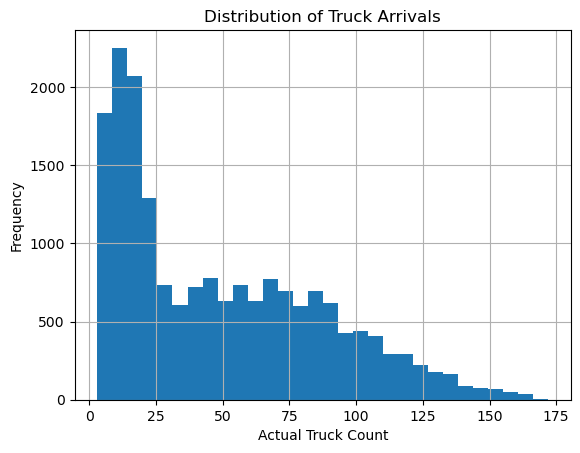

In [34]:
import matplotlib.pyplot as plt

plt.figure()
df['Actual_Truck_Count'].hist(bins=30)
plt.xlabel("Actual Truck Count")
plt.ylabel("Frequency")
plt.title("Distribution of Truck Arrivals")
plt.show()


In [35]:
df.groupby('Dry_Cargo_Type')['Actual_Truck_Count'].mean()


Dry_Cargo_Type
Break Bulk    11.990256
Dry Bulk      64.492168
Name: Actual_Truck_Count, dtype: float64

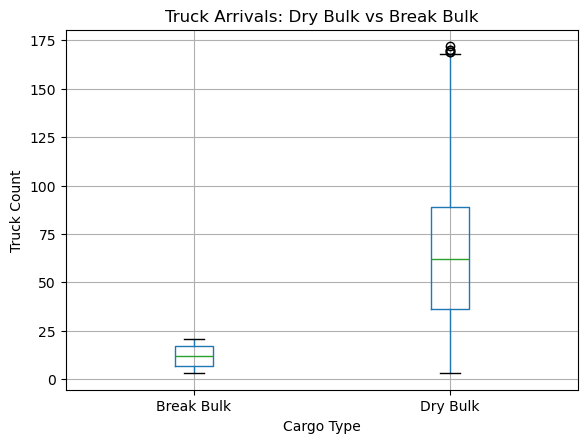

In [36]:
df.boxplot(
    column='Actual_Truck_Count',
    by='Dry_Cargo_Type'
)
plt.title("Truck Arrivals: Dry Bulk vs Break Bulk")
plt.suptitle("")
plt.xlabel("Cargo Type")
plt.ylabel("Truck Count")
plt.show()


In [37]:
df.groupby('Operation')['Actual_Truck_Count'].mean()


Operation
Export    49.104332
Import    48.880175
Name: Actual_Truck_Count, dtype: float64

In [38]:
df[['Declared_Qty_Tons', 'Actual_Truck_Count']].corr()


,Declared_Qty_Tons,Actual_Truck_Count
Declared_Qty_Tons,1.000000,0.932878
Actual_Truck_Count,0.932878,1.000000


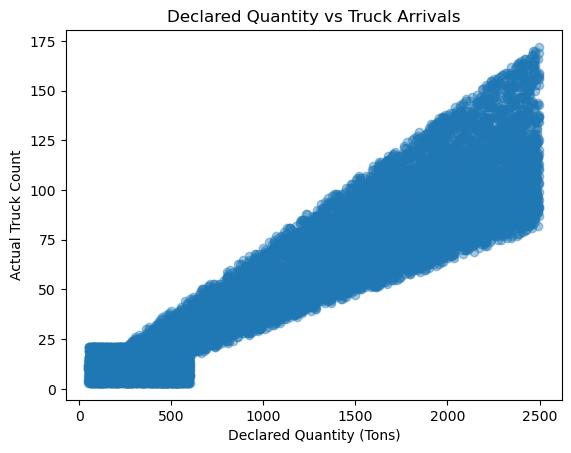

In [39]:
plt.figure()
plt.scatter(
    df['Declared_Qty_Tons'],
    df['Actual_Truck_Count'],
    alpha=0.4
)
plt.xlabel("Declared Quantity (Tons)")
plt.ylabel("Actual Truck Count")
plt.title("Declared Quantity vs Truck Arrivals")
plt.show()


In [40]:
df.groupby('Hour')['Actual_Truck_Count'].mean()


Hour
0     49.989051
1     48.132124
2     48.124679
3     49.098425
4     49.543536
5     48.157568
6     48.002538
7     49.245860
8     48.342818
9     46.895086
10    47.467213
11    49.707317
12    49.950667
13    48.447439
14    43.928385
15    50.428035
16    50.003659
17    49.219945
18    49.589354
19    49.361333
20    49.495856
21    49.249682
22    51.754121
23    51.170732
Name: Actual_Truck_Count, dtype: float64

In [41]:
df.groupby('Is_Weekend')['Actual_Truck_Count'].mean()



Is_Weekend
0    49.374703
1    47.981047
Name: Actual_Truck_Count, dtype: float64

In [42]:
df.groupby('Gate_No')['Actual_Truck_Count'].mean()


Gate_No
Gate-A    48.388732
Gate-B    49.998249
Gate-C    48.429915
Gate-D    49.071767
Name: Actual_Truck_Count, dtype: float64

In [43]:
df.groupby('Storage_Type')['Actual_Truck_Count'].mean()


Storage_Type
Direct     37.523645
Storage    57.804569
Unknown    49.266262
Name: Actual_Truck_Count, dtype: float64

FEATURE ENGINEERING


In [46]:
df_fe = df.copy()



In [48]:
df_fe['Estimated_Truck_Count'] = (
    df_fe['Declared_Qty_Tons'] / df_fe['Truck_Capacity_Tons']
)


In [49]:
df_fe['Planned_Gate_Utilization'] = (
    df_fe['Estimated_Truck_Count'] /
    df_fe['Gate_Capacity_Trucks_Per_Hour']
)


In [50]:
df_fe = pd.get_dummies(
    df_fe,
    columns=[
        'Dry_Cargo_Type',
        'Operation',
        'Storage_Type',
        'Gate_No',
        'Commodity'
    ],
    drop_first=True
)


In [59]:
X_train.dtypes[X_train.dtypes == 'object']


Customer    object
dtype: object

In [61]:

cat_cols = df_fe.select_dtypes(include='object').columns
cat_cols


Index(['Customer'], dtype='object')

In [62]:
df_fe = pd.get_dummies(df_fe, columns=cat_cols, drop_first=True)


In [63]:
X = df_fe.drop('Actual_Truck_Count', axis=1)
y = df_fe['Actual_Truck_Count']


In [64]:
X.shape
X.columns


Index(['Hour', 'Declared_Qty_Tons', 'Truck_Capacity_Tons', 'Gate_Lanes',
       'Gate_Capacity_Trucks_Per_Hour', 'Peak_Hour_Flag', 'Avg_Gate_Wait_Min',
       'Day_of_Week', 'Month', 'Is_Weekend', 'Estimated_Truck_Count',
       'Planned_Gate_Utilization', 'Dry_Cargo_Type_Dry Bulk',
       'Operation_Import', 'Storage_Type_Storage', 'Storage_Type_Unknown',
       'Gate_No_Gate-B', 'Gate_No_Gate-C', 'Gate_No_Gate-D',
       'Commodity_Cement', 'Commodity_Coal', 'Commodity_Fertilizer',
       'Commodity_Grain', 'Commodity_Iron Ore', 'Commodity_Machinery',
       'Commodity_Project Cargo', 'Commodity_Steel Coils',
       'Commodity_Steel Plates', 'Commodity_Timber', 'Customer_FCI',
       'Customer_JSW', 'Customer_L&T', 'Customer_NTPC', 'Customer_Tata Steel',
       'Customer_UltraTech', 'Customer_Unknown'],
      dtype='object')

MODEL TRAINING

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)


In [67]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [68]:
rf_model


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

MODEL EVALUATION

In [69]:
y_pred = rf_model.predict(X_test)


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(3.127966032608696, 4.163691940747496)

In [71]:
residuals = y_test - y_pred


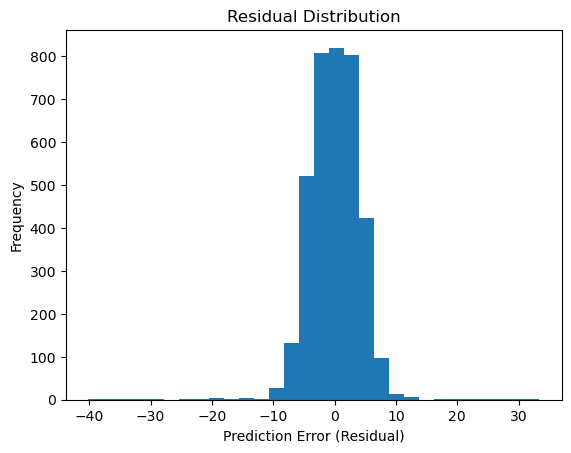

In [72]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [73]:
eval_df = X_test.copy()
eval_df['Actual'] = y_test
eval_df['Predicted'] = y_pred


In [74]:
eval_df['Cargo_Type'] = np.where(
    eval_df.get('Dry_Cargo_Type_Dry Bulk', 0) == 1,
    'Dry Bulk',
    'Break Bulk'
)


In [75]:
eval_df.groupby('Cargo_Type').apply(
    lambda x: mean_absolute_error(x['Actual'], x['Predicted'])
)


C:\Users\Dhruv Mohanty\AppData\Local\Temp\ipykernel_30492\284514385.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eval_df.groupby('Cargo_Type').apply(


Cargo_Type
Break Bulk    3.431164
Dry Bulk      2.997350
dtype: float64

FUTURE DATA PREPROCCESING 

In [77]:
df_future = pd.read_excel(
    "Future_Truck_Forecasting_Resume_Grade_Dataset_v2.xlsx",
    sheet_name="Future_Planning_Data"
)


df_future_proc = df_future.copy()


df_future_proc['Date'] = pd.to_datetime(df_future_proc['Date'])
df_future_proc['Day_of_Week'] = df_future_proc['Date'].dt.dayofweek
df_future_proc['Month'] = df_future_proc['Date'].dt.month
df_future_proc['Is_Weekend'] = (df_future_proc['Day_of_Week'] >= 5).astype(int)

df_future_proc.drop(columns=['Date'], inplace=True)



df_future_proc['Customer'] = df_future_proc['Customer'].fillna('Unknown')
df_future_proc['Storage_Type'] = df_future_proc['Storage_Type'].fillna('Unknown')

df_future_proc['Truck_Capacity_Tons'] = df_future_proc[
    'Truck_Capacity_Tons'
].fillna(df_future_proc['Truck_Capacity_Tons'].median())



EDA FUTURE DATA

In [79]:
df_future_proc['Estimated_Truck_Count'] = (
    df_future_proc['Declared_Qty_Tons'] /
    df_future_proc['Truck_Capacity_Tons']
)

df_future_proc['Planned_Gate_Utilization'] = (
    df_future_proc['Estimated_Truck_Count'] /
    df_future_proc['Gate_Capacity_Trucks_Per_Hour']
)


In [80]:
df_future_proc = pd.get_dummies(df_future_proc, drop_first=True)


In [81]:
df_future_proc = df_future_proc.reindex(
    columns=X.columns,
    fill_value=0
)


MODEL PREDICTION

In [82]:
df_future['Predicted_Truck_Count'] = rf_model.predict(df_future_proc)


In [83]:
df_future[
    ['Date', 'Hour', 'Gate_No', 'Dry_Cargo_Type', 'Operation',
     'Declared_Qty_Tons', 'Predicted_Truck_Count']
].head(10)


,Date,Hour,Gate_No,Dry_Cargo_Type,Operation,Declared_Qty_Tons,Predicted_Truck_Count
0,2025-11-27,6,Gate-C,Break Bulk,Export,148,4.055
1,2025-07-05,0,Gate-B,Dry Bulk,Export,1968,66.565
2,2025-08-15,12,Gate-A,Dry Bulk,Import,402,15.495
3,2026-03-11,5,Gate-C,Break Bulk,Import,149,3.685
4,2025-10-06,10,Gate-C,Dry Bulk,Import,506,19.540
5,2025-08-29,2,Gate-B,Dry Bulk,Import,884,34.710
6,2026-03-20,14,Gate-D,Dry Bulk,Import,1578,86.610
7,2026-01-02,15,Gate-D,Break Bulk,Import,179,3.565
8,2025-08-25,9,Gate-B,Dry Bulk,Import,1937,93.155
9,2025-09-22,19,Gate-D,Dry Bulk,Import,1491,67.880


In [84]:
df_future.groupby(
    ['Date', 'Hour', 'Gate_No']
)['Predicted_Truck_Count'].sum().reset_index()


,Date,Hour,Gate_No,Predicted_Truck_Count
0,2025-07-01,2,Gate-B,5.200
1,2025-07-01,2,Gate-D,14.560
2,2025-07-01,7,Gate-B,16.045
3,2025-07-01,11,Gate-D,40.990
4,2025-07-01,13,Gate-B,5.015
...,...,...,...,...
3675,2026-03-30,18,Gate-A,92.960
3676,2026-03-30,18,Gate-D,58.410
3677,2026-03-30,21,Gate-B,68.675
3678,2026-03-30,22,Gate-A,23.535


Gate Utilization = Predicted Trucks / Gate Capacity per Hour


In [86]:
df_future['Gate_Utilization'] = (
    df_future['Predicted_Truck_Count'] /
    df_future['Gate_Capacity_Trucks_Per_Hour']
)


In [87]:
df_future['Congestion_Index'] = (
    df_future['Gate_Utilization']
    + (0.3 * (df_future['Storage_Type'] == 'Storage').astype(int))
    + (0.2 * df_future['Peak_Hour_Flag'])
)


In [88]:
def traffic_level(ci):
    if ci < 0.8:
        return 'Low'
    elif ci < 1.2:
        return 'Medium'
    else:
        return 'High'

df_future['Traffic_Level'] = df_future['Congestion_Index'].apply(traffic_level)


In [89]:
df_future[
    ['Date','Hour','Gate_No','Dry_Cargo_Type','Operation',
     'Predicted_Truck_Count','Gate_Utilization',
     'Congestion_Index','Traffic_Level']
].head(10)


,Date,Hour,Gate_No,Dry_Cargo_Type,Operation,Predicted_Truck_Count,Gate_Utilization,Congestion_Index,Traffic_Level
0,2025-11-27,6,Gate-C,Break Bulk,Export,4.055,0.115857,0.115857,Low
1,2025-07-05,0,Gate-B,Dry Bulk,Export,66.565,1.331300,1.331300,High
2,2025-08-15,12,Gate-A,Dry Bulk,Import,15.495,0.221357,0.521357,Low
3,2026-03-11,5,Gate-C,Break Bulk,Import,3.685,0.105286,0.105286,Low
4,2025-10-06,10,Gate-C,Dry Bulk,Import,19.540,0.558286,1.058286,Medium
5,2025-08-29,2,Gate-B,Dry Bulk,Import,34.710,0.694200,0.994200,Medium
6,2026-03-20,14,Gate-D,Dry Bulk,Import,86.610,2.887000,3.187000,High
7,2026-01-02,15,Gate-D,Break Bulk,Import,3.565,0.118833,0.118833,Low
8,2025-08-25,9,Gate-B,Dry Bulk,Import,93.155,1.863100,2.363100,High
9,2025-09-22,19,Gate-D,Dry Bulk,Import,67.880,2.262667,2.762667,High


In [91]:
df_future['Congestion_Index'].describe()

count    4000.000000
mean        1.268296
std         0.944206
min         0.062000
25%         0.400050
50%         1.169314
75%         1.880332
max         4.548667
Name: Congestion_Index, dtype: float64

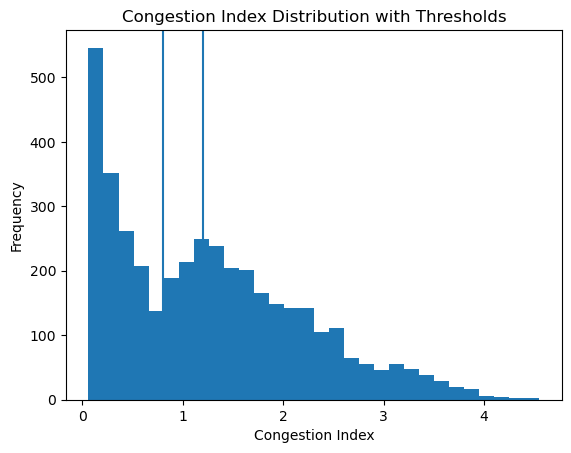

In [92]:
plt.figure()
plt.hist(df_future['Congestion_Index'] , bins = 30)
plt.axvline(0.8)
plt.axvline(1.2)
plt.xlabel('Congestion Index')
plt.ylabel('Frequency')
plt.title('Congestion Index Distribution with Thresholds')
plt.show()

In [103]:
from matplotlib.colors import ListedColormap
traffic_cmap= ListedColormap(['2ecc71','#f1c40f','#e74c3c'])

In [104]:
gate_hour = df_future.pivot_table(
    values='Predicted_Truck_Count',
    index='Gate_No',
    columns='Hour',
    aggfunc='mean'
)


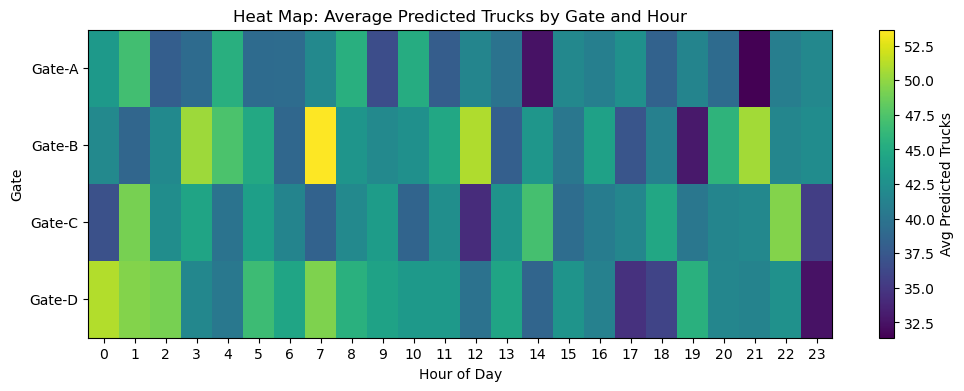

In [108]:
plt.figure(figsize=(12,4))
plt.imshow(gate_hour, aspect='auto',)
plt.colorbar(label='Avg Predicted Trucks')
plt.yticks(range(len(gate_hour.index)), gate_hour.index)
plt.xticks(range(0,24), range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Gate")
plt.title("Heat Map: Average Predicted Trucks by Gate and Hour")
plt.show()


In [107]:
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}

df_future['Traffic_Level_Num'] = df_future['Traffic_Level'].map(traffic_map)


In [96]:
traffic_heat = df_future.pivot_table(
    values='Traffic_Level_Num',
    index='Gate_No',
    columns='Hour',
    aggfunc='mean'
)


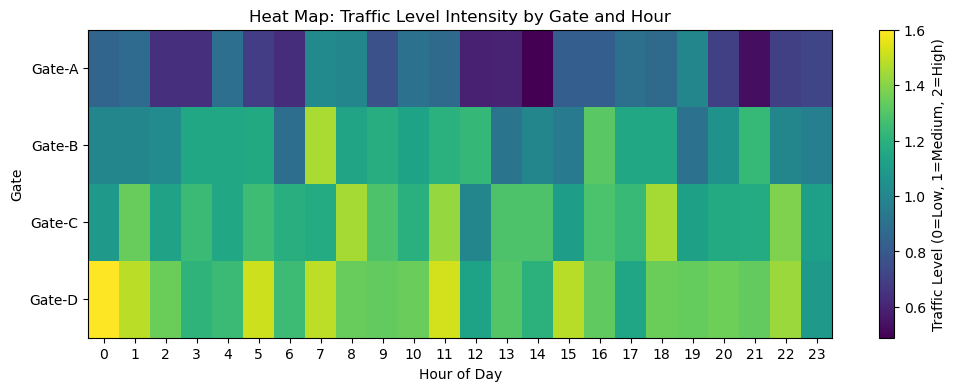

In [97]:
plt.figure(figsize=(12,4))
plt.imshow(traffic_heat, aspect='auto')
plt.colorbar(label='Traffic Level (0=Low, 1=Medium, 2=High)')
plt.yticks(range(len(traffic_heat.index)), traffic_heat.index)
plt.xticks(range(0,24), range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Gate")
plt.title("Heat Map: Traffic Level Intensity by Gate and Hour")
plt.show()


In [110]:
output_file='Future_Truck_Forecast_With_Predictions.xlsx'
df_future.to_excel(output_file,index = False)